In [1]:
!rm -r ./mnist

!wget https://www.dropbox.com/s/5yre1ofqco5titj/mnist.zip?dl=0 -O mnist.zip
!unzip -q mnist.zip

!ls

rm: cannot remove './mnist': No such file or directory
--2020-02-08 10:16:51--  https://www.dropbox.com/s/5yre1ofqco5titj/mnist.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5yre1ofqco5titj/mnist.zip [following]
--2020-02-08 10:16:52--  https://www.dropbox.com/s/raw/5yre1ofqco5titj/mnist.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7241ff5e62995c3594e5cbac26.dl.dropboxusercontent.com/cd/0/inline/AxviwANx55VqAIgStYRU8MUVebDNA8VCYLJ8rWxTGjMsutRRBGhM-CAaCQGUApKwEgjO-Q7IopZFv4HvRTzG6xGrKfv3DMFYuA6u1tktVMvWuQ/file# [following]
--2020-02-08 10:16:52--  https://uc7241ff5e62995c3594e5cbac26.dl.dropboxusercontent.com/cd/0/inline/AxviwANx55VqAIgStYRU8MUVebDNA8VCYLJ8rWxTGjMsutRRBGhM-CAaCQGUApKwEgjO-Q7IopZFv4HvRTzG

# Data Loader

Data structure for loading data in parallel to the model training procedure. $DataLoader$ and $Dataset$ objects load (in a multithreaded fashion), preprocess and concatenate tensors/ndarrays/list/dicts, sending them in batches to the training procedure.

## Defining the custom Dataset subclass

In [0]:
import os
import numpy as np
import torch

from torch.utils import data
from skimage import io

# Constants.
num_classes = 10
root = 'mnist/'

# Class that reads a sequence of image paths from a text file and creates a data.Dataset with them.
class CustomDataset(data.Dataset):

    def __init__(self, fold, normalization = 'default'):

        super(CustomDataset, self).__init__()
        
        # Initializing variables.
        self.fold = fold
        self.normalization = normalization

        # Creating list of paths.
        self.imgs = self.make_dataset()

        # Check for consistency in list.
        if len(self.imgs) == 0:

            raise (RuntimeError('Found 0 images, please check the data set'))

    def make_dataset(self):

        # Initiating item list.
        items = []

        # Joining input paths.
        img_path = os.path.join(root, self.fold)

        # Reading paths from directory.
        data_list = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]
        
        # Creating list containing image and ground truth paths.
        for it in data_list:
            item = os.path.join(img_path, it)
            items.append(item)

        # Returning list.
        return items

    def __getitem__(self, index):

        # Reading items from list.
        img_path = self.imgs[index]

        # Reading images.
        img = io.imread(img_path)
        
        # Reading label from image file.
        lab = int(img_path[-5])

        # Removing unwanted channels. For the case of RGB images.
        if len(img.shape) > 2:
            img = img[:, :, 0]

        # Casting images to the appropriate dtypes.
        img = img.astype(np.float32)

        # Normalization.
        if self.normalization == 'statistical':

            img = (img - img.mean()) / img.std()

        else:

            mn = img.min()
            mx = img.max()
            img = ((img - mn) / (mx - mn))

        # Adding channel dimension.
        img = np.expand_dims(img, axis=0)

        # Turning to tensors.
        img = torch.from_numpy(img)

        # Returning to iterator.
        return img, lab

    def __len__(self):

        return len(self.imgs)

## Iterating over dataset

#####################################
Iteration:  0
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



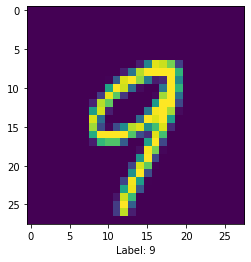

#####################################
Iteration:  1
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



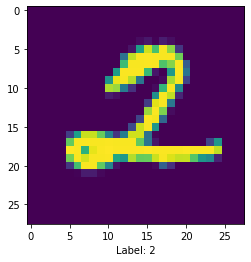

#####################################
Iteration:  2
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



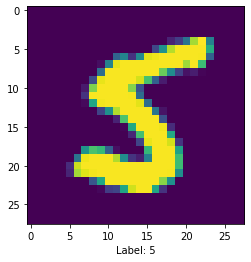

#####################################
Iteration:  3
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



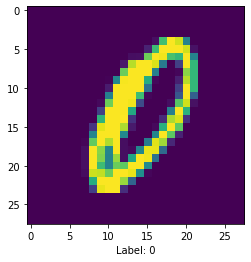

#####################################
Iteration:  4
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



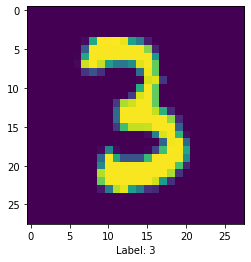

#####################################
Iteration:  5
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



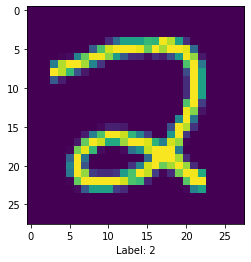

#####################################
Iteration:  6
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



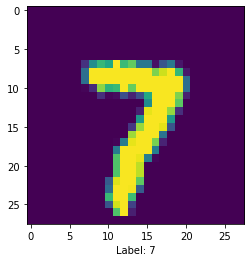

#####################################
Iteration:  7
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



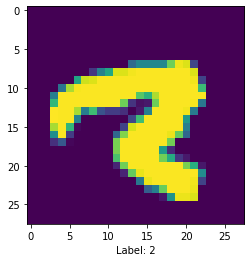

#####################################
Iteration:  8
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



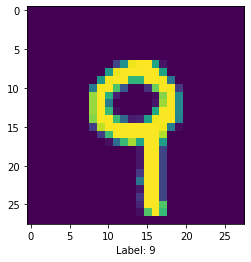

#####################################
Iteration:  9
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



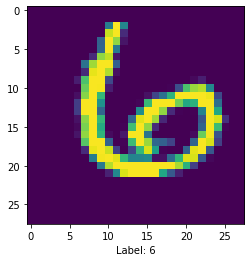

#####################################
Iteration:  10
Data Size:  torch.Size([1, 1, 28, 28])
Labels Size:  torch.Size([1])



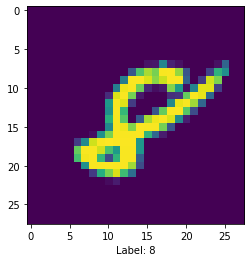

In [3]:
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

%matplotlib inline

# Setting data loader.
batch_size = 1
num_workers = 4

# train_set = ListDataset('train')
# train_loader = DataLoader(train_set, batch_size, num_workers=num_workers, shuffle=True)
test_set = CustomDataset('test')
test_loader = DataLoader(test_set, batch_size, num_workers=num_workers, shuffle=False)

# Iterating over batches.
# for it, data in enumerate(train_loader):
for it, data in enumerate(test_loader):

    # Obtaining images and labels for batch.
    inps, labs = data

    print('#####################################')
    print('Iteration: ', it)
    print('Data Size: ', inps.size())
    print('Labels Size: ', labs.size())
    print('')
    
    plt.imshow(inps[0].squeeze().data.numpy())
    plt.xlabel('Label: ' + str(labs[0].numpy()))
    plt.show()
    
    # Ending for early for visualization.
    if it >= 10:
        break
    